# Telecom Churn - Group Assignment

## Business Problem

**Overview**<br>
he telecommunications industry experiences an average of 15-25% annual churn rate. It costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition

For many incumbent operators, retaining high profitable customers is the number one business goal.

### GOAL 

1. build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
2. define high-value customers based on a certain metric and predict churn only on high-value customers.

<b> Churn Definition</b>
Churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. This project is based on the Indian and Southeast Asian market and prepaid is the most common model in this region.
In this project, you will <b>use the usage-based definition to define churn</b>. Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

# Business objective

<b>Predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.</b>

<b>There are three phases of customer lifecycle :</b>
    
<b>The ‘good’ phase:</b>In this phase, the customer is happy with the service and behaves as usual.

<b>The ‘action’ phase:</b> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling 
    offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. 
    In this phase, the customer usually shows different behaviour than the ‘good’ months. 
    Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can
    be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

<b>The ‘churn’ phase:</b> In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


<b> In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. </b>

In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading Dataset
telechurn = pd.read_csv("telecom_churn_data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)


In [3]:
telechurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#Sanity Check
print(telechurn.shape)
print(telechurn.describe())
print(telechurn.info())

(99999, 226)
       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.80

## Get data pertaining to high value customers

## PART A - DATA PREPARATION



1. Derive new features: derive features you think could be important indicators of churn
2.Filter high-value customers: you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)- 29.9k rows

3. Tag churners and remove attributes of the churn phase: Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

### 1. Get data for High Value Customer

In [5]:
# Create a new column 'GP_rech_amt' by adding values of 'total_rech_amt_6' and 'total_rech_amt_7'
telechurn['GP_reach_amt'] = telechurn['total_rech_amt_6']+telechurn['total_rech_amt_7']
telechurn['GP_reach_amt'].describe([.5,.7,.75,.9])

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
50%        458.000000
70%        737.000000
75%        838.000000
90%       1396.000000
max      75525.000000
Name: GP_reach_amt, dtype: float64

In [6]:
telechurn['mobile_number'].nunique()

99999

In [7]:
telechurn = telechurn[telechurn.GP_reach_amt > 736]
telechurn.shape

(30011, 227)

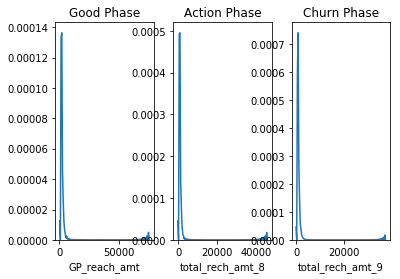

In [8]:
# plot the good phase  vs Action phase details
# subplot 1
plt.subplot(1, 3, 1)
plt.title('Good Phase')
sns.distplot(telechurn['GP_reach_amt'],hist=False)

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Action Phase')
sns.distplot(telechurn['total_rech_amt_8'],hist=False)

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Churn Phase')
sns.distplot(telechurn['total_rech_amt_9'],hist=False)

plt.show()

### 2. Tag CHURNERS


In [9]:
#Tag churners and remove attributes of the churn phase: 
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
#Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once 
# in the churn phase. The attributes you need to use to 
#tag churners are: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9
import numpy as np
telechurn["churn"] = np.where(telechurn.eval("(total_ic_mou_9==0 or total_og_mou_9==0) & (vol_2g_mb_9==0 or vol_3g_mb_9==0)"), 1, 0)



In [10]:
telechurn.churn.value_counts()

0    26964
1     3047
Name: churn, dtype: int64

#### % of Churn

In [11]:
churn = (sum(telechurn['churn'])/len(telechurn['churn'].index))*100
churn

10.15294392056246

In [12]:
telechurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 228 entries, mobile_number to churn
dtypes: float64(179), int32(1), int64(36), object(12)
memory usage: 52.3+ MB


In [13]:
# removing all columns with suffix _9

telechurn = telechurn.drop(['last_date_of_month_9','arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9',
'roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9',
'std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','total_og_mou_9',
'loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9',
'std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9',
'max_rech_amt_9','date_of_last_rech_9','last_day_rch_amt_9','date_of_last_rech_data_9','total_rech_data_9','max_rech_data_9',
'count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9','night_pck_user_9',
'monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9'], axis=1)

In [14]:
# Remove columns circle_id  loc_og_t2o_mou  std_og_t2o_mou, loc_ic_t2o_mou as all values are zeros
#last_date_of_month_6 - all fields are last date of month
#last_date_of_month_7 - all fields are last date of month
#last_date_of_month_8 - all fields are last date of month
#std_og_t2c_mou_6 - all values 0
#std_og_t2c_mou_7
#std_og_t2c_mou_8
#std_ic_t2o_mou_6
#std_ic_t2o_mou_7
#std_ic_t2o_mou_
telechurn = telechurn.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou', 'loc_ic_t2o_mou','last_date_of_month_6',
                           'last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
                           'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [15]:
print(telechurn.describe())

       mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.001100e+04  30011.000000  30011.000000  30011.000000  29695.000000   
mean    7.001223e+09    587.284404    589.135427    534.857433    299.184718   
std     6.846405e+05    442.722413    462.897814    492.259586    462.202367   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
25%     7.000641e+09    364.161000    365.004500    289.609500     42.960000   
50%     7.001232e+09    495.682000    493.561000    452.091000    128.330000   
75%     7.001814e+09    703.922000    700.788000    671.150000    357.120000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29708.000000  29073.000000  29695.000000  29708.000000  29073.000000   
mean     307.447285    276.234168    422.380819    428.248096    387.121245   
std      483.244786    471.505518    471.0

In [16]:
telechurn.isnull().sum()

mobile_number           0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6           316
onnet_mou_7           303
onnet_mou_8           938
offnet_mou_6          316
offnet_mou_7          303
offnet_mou_8          938
roam_ic_mou_6         316
roam_ic_mou_7         303
roam_ic_mou_8         938
roam_og_mou_6         316
roam_og_mou_7         303
roam_og_mou_8         938
loc_og_t2t_mou_6      316
loc_og_t2t_mou_7      303
loc_og_t2t_mou_8      938
loc_og_t2m_mou_6      316
loc_og_t2m_mou_7      303
loc_og_t2m_mou_8      938
loc_og_t2f_mou_6      316
loc_og_t2f_mou_7      303
loc_og_t2f_mou_8      938
loc_og_t2c_mou_6      316
loc_og_t2c_mou_7      303
loc_og_t2c_mou_8      938
loc_og_mou_6          316
loc_og_mou_7          303
                    ...  
arpu_3g_7           18349
arpu_3g_8           18257
arpu_2g_6           18614
arpu_2g_7           18349
arpu_2g_8           18257
night_pck_user_6    18614
night_pck_user_7    18349
night_pck_us

In [17]:
# Following columns with >60% null values. Check which are useful for the analysis
telechurn = telechurn.drop(['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7',
'night_pck_user_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','fb_user_6','fb_user_7',
'fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
'arpu_3g_6','arpu_3g_7','arpu_3g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6',
'av_rech_amt_data_7','av_rech_amt_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','total_rech_data_6','total_rech_data_7',
'total_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis =1)

In [18]:
telechurn.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6            316
onnet_mou_7            303
onnet_mou_8            938
offnet_mou_6           316
offnet_mou_7           303
offnet_mou_8           938
roam_ic_mou_6          316
roam_ic_mou_7          303
roam_ic_mou_8          938
roam_og_mou_6          316
roam_og_mou_7          303
roam_og_mou_8          938
loc_og_t2t_mou_6       316
loc_og_t2t_mou_7       303
loc_og_t2t_mou_8       938
loc_og_t2m_mou_6       316
loc_og_t2m_mou_7       303
loc_og_t2m_mou_8       938
loc_og_t2f_mou_6       316
loc_og_t2f_mou_7       303
loc_og_t2f_mou_8       938
loc_og_t2c_mou_6       316
loc_og_t2c_mou_7       303
loc_og_t2c_mou_8       938
loc_og_mou_6           316
loc_og_mou_7           303
                      ... 
date_of_last_rech_7    114
date_of_last_rech_8    594
last_day_rch_amt_6       0
last_day_rch_amt_7       0
last_day_rch_amt_8       0
vol_2g_mb_6              0
v

In [19]:
# remove rows corresponding to onnet_mou_8
telechurn = telechurn[~np.isnan(telechurn['onnet_mou_6'])]
telechurn = telechurn[~np.isnan(telechurn['onnet_mou_7'])]
telechurn = telechurn[~np.isnan(telechurn['onnet_mou_8'])]
telechurn = telechurn[~pd.isnull(telechurn['date_of_last_rech_6'])]
telechurn = telechurn[~pd.isnull(telechurn['date_of_last_rech_7'])]
telechurn = telechurn[~pd.isnull(telechurn['date_of_last_rech_8'])]
telechurn.isnull().sum()

mobile_number          0
arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
                      ..
date_of_last_rech_7    0
date_of_last_rech_8    0
last_day_rch_amt_6     0
last_day_rch_amt_7     0
last_day_rch_amt_8     0
vol_2g_mb_6            0
vol_2g_mb_7            0
vol_2g_mb_8            0
vol_3g_mb_6            0


In [20]:
telechurn.info()
telechurn.isnull().any().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 7 to 99997
Columns: 131 entries, mobile_number to churn
dtypes: float64(100), int32(1), int64(27), object(3)
memory usage: 28.6+ MB


False

In [21]:
churn_a = (sum(telechurn['churn'])/len(telechurn['churn'].index))*100
churn_a

7.364762874293537

### Churn Rate - 7.36%. Since the Churn Rate is low, it is case of class imbalance. To manage class imbalance, following will be considered while modeling

<b>The following performance measures that can give more insight into the accuracy of the model than traditional classification accuracy:

Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
You can delete instances from the over-represented class, called under-sampling

</b>

In [22]:
telechurn.churn.value_counts()

0    26389
1     2098
Name: churn, dtype: int64

In [23]:
telechurn.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,GP_reach_amt,churn
count,2.848700e+04,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,...,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000
mean,7.001227e+09,584.906157,597.143626,551.597014,296.930201,310.401194,277.904387,418.341422,432.140042,388.039762,...,0.138905,0.152420,0.146383,1279.162636,132.866144,136.587508,120.876655,6.797101,1397.662197,0.073648
std,6.815641e+05,430.034924,461.236405,488.394273,457.517164,482.052667,470.471350,462.763446,486.272330,474.710129,...,0.876278,0.960503,0.993088,977.224772,394.146064,410.489232,387.936220,49.460867,983.870636,0.261201
min,7.000000e+09,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,737.000000,0.000000
25%,7.000649e+09,364.794500,371.715500,308.540000,43.470000,44.510000,33.420000,141.955000,144.950000,110.440000,...,0.000000,0.000000,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000,901.500000,0.000000
50%,7.001238e+09,493.397000,498.078000,463.942000,128.740000,130.990000,108.130000,285.490000,290.030000,253.990000,...,0.000000,0.000000,0.000000,934.000000,0.000000,0.000000,0.000000,0.000000,1142.000000,0.000000
75%,7.001814e+09,697.488000,704.694000,681.704000,355.495000,370.465000,314.010000,522.870000,541.785000,495.250000,...,0.000000,0.000000,0.000000,1959.500000,8.030000,3.510000,0.000000,0.000000,1600.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,29.000000,33.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,75525.000000,1.000000


In [24]:
# Change date columns to 'Recency - Days' 
telechurn['date_of_last_rech_6'] = pd.to_datetime(telechurn['date_of_last_rech_6'])
telechurn['date_of_last_rech_7'] = pd.to_datetime(telechurn['date_of_last_rech_7'])
telechurn['date_of_last_rech_8'] = pd.to_datetime(telechurn['date_of_last_rech_8'])
recency_last_rech = telechurn[['mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']]
maximum6 = max(recency_last_rech.date_of_last_rech_6)
maximum7 = max(recency_last_rech.date_of_last_rech_7)
maximum8 = max(recency_last_rech.date_of_last_rech_8)
maximum6 = maximum6 + pd.DateOffset(days=1)
maximum7 = maximum7 + pd.DateOffset(days=1)
maximum8 = maximum8 + pd.DateOffset(days=1)
recency_last_rech['day_last_rech_6'] = (maximum6 - recency_last_rech.date_of_last_rech_6).dt.days
recency_last_rech['day_last_rech_7'] = (maximum7 - recency_last_rech.date_of_last_rech_7).dt.days
recency_last_rech['day_last_rech_8'] = (maximum8 - recency_last_rech.date_of_last_rech_8).dt.days
recency_last_rech.head()

C:\AppFolder\Softwares\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\AppFolder\Softwares\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\AppFolder\Softwares\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,mobile_number,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,day_last_rech_6,day_last_rech_7,day_last_rech_8
7,7000701601,2014-06-27,2014-07-25,2014-08-26,4,7,6
8,7001524846,2014-06-25,2014-07-31,2014-08-30,6,1,2
13,7002191713,2014-06-20,2014-07-22,2014-08-30,11,10,2
16,7000875565,2014-06-30,2014-07-31,2014-08-14,1,1,18
17,7000187447,2014-06-30,2014-07-30,2014-08-25,1,2,7


In [25]:
recency_last_rech= recency_last_rech.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
telechurn = telechurn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
telechurn = telechurn.merge(recency_last_rech, on='mobile_number')
telechurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28487 entries, 0 to 28486
Columns: 131 entries, mobile_number to day_last_rech_8
dtypes: float64(100), int32(1), int64(30)
memory usage: 28.6 MB


In [26]:
# Scaling / Standardization
telechurn.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,GP_reach_amt,churn,day_last_rech_6,day_last_rech_7,day_last_rech_8
count,2.848700e+04,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,...,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000
mean,7.001227e+09,584.906157,597.143626,551.597014,296.930201,310.401194,277.904387,418.341422,432.140042,388.039762,...,1279.162636,132.866144,136.587508,120.876655,6.797101,1397.662197,0.073648,4.046477,4.264893,4.968407
std,6.815641e+05,430.034924,461.236405,488.394273,457.517164,482.052667,470.471350,462.763446,486.272330,474.710129,...,977.224772,394.146064,410.489232,387.936220,49.460867,983.870636,0.261201,4.048495,4.064111,4.961990
min,7.000000e+09,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,737.000000,0.000000,1.000000,1.000000,1.000000
25%,7.000649e+09,364.794500,371.715500,308.540000,43.470000,44.510000,33.420000,141.955000,144.950000,110.440000,...,484.000000,0.000000,0.000000,0.000000,0.000000,901.500000,0.000000,1.000000,1.000000,2.000000
50%,7.001238e+09,493.397000,498.078000,463.942000,128.740000,130.990000,108.130000,285.490000,290.030000,253.990000,...,934.000000,0.000000,0.000000,0.000000,0.000000,1142.000000,0.000000,3.000000,3.000000,3.000000
75%,7.001814e+09,697.488000,704.694000,681.704000,355.495000,370.465000,314.010000,522.870000,541.785000,495.250000,...,1959.500000,8.030000,3.510000,0.000000,0.000000,1600.000000,0.000000,5.000000,6.000000,7.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,75525.000000,1.000000,30.000000,31.000000,31.000000


In [27]:
df1 = telechurn.drop(['mobile_number','churn'], axis=1)
df2 = telechurn[['mobile_number','churn']]
normalized_df=(df1-df1.mean())/df1.std()
telechurn_final = pd.concat([df2,normalized_df], axis =1)
telechurn_final.head()

,mobile_number,churn,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,GP_reach_amt,day_last_rech_6,day_last_rech_7,day_last_rech_8
0,7000701601,1,1.126127,1.631932,5.364279,-0.522582,-0.530484,-0.479550,0.075824,0.277663,...,-0.147401,-0.488283,-0.190605,-0.285531,-0.263282,-0.137424,0.988278,-0.011480,0.672990,0.207899
1,7001524846,0,-0.479461,-0.227477,-0.848157,0.255203,0.084283,-0.516130,-0.699453,-0.722867,...,-0.147401,-0.986633,-0.283743,1.885707,0.003308,-0.137424,-0.365558,0.482531,-0.803347,-0.598229
2,7002191713,0,-0.214076,-0.848746,0.085306,0.447699,-0.419065,0.544849,-0.010873,-0.643384,...,-0.147401,1.358784,-0.337099,-0.332743,-0.311589,-0.137424,-0.648116,1.717557,1.411159,-0.598229
3,7000875565,0,-0.357950,-0.644517,-0.744691,-0.538603,-0.490385,-0.440610,-0.263745,-0.416228,...,-0.147401,-0.786065,-0.337099,-0.326775,-0.255162,-0.137424,-0.487526,-0.752496,-0.803347,2.626284
4,7000187447,0,0.244403,-1.253508,-1.077199,1.943052,-0.624665,-0.574136,-0.770807,-0.888679,...,-0.147401,-0.626430,-0.337099,-0.332743,-0.311589,-0.137424,-0.591198,-0.752496,-0.557291,0.409431


#### Eliminating rows from the dataset to balance the classes

In [28]:
telechurn_final=telechurn_final.drop(telechurn_final.query('churn == 0').sample(frac=.6).index)

In [29]:
telechurn_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12654 entries, 0 to 28486
Columns: 131 entries, mobile_number to day_last_rech_8
dtypes: float64(129), int32(1), int64(1)
memory usage: 12.7 MB


In [30]:
telechurn_final['churn'].value_counts()

0    10556
1     2098
Name: churn, dtype: int64

# Building Model

<b>Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.</b>

## PART A - Predict the customers who will churn

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

### Splitting Data into Training and Test Sets

In [31]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telechurn_final.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telechurn_final['churn']

y.head()

0    1
2    0
3    0
4    0
6    0
Name: churn, dtype: int32

In [32]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### PCA 

In [33]:
X_train.shape

(8857, 129)

In [34]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [35]:
#Doing the PCA on the train data
pca.fit(X_train)
pca.components_

array([[ 1.50747624e-01,  1.56932598e-01,  1.67292429e-01, ...,
         8.33236086e-04, -7.85373062e-03, -1.35729687e-02],
       [ 1.16691050e-01,  1.29947537e-01,  1.06036096e-01, ...,
        -7.23350589e-02, -6.98925508e-02, -6.29964811e-02],
       [ 1.30053111e-01,  1.52023513e-01,  1.42582325e-01, ...,
         7.67847536e-02,  6.88980851e-02,  5.88264449e-02],
       ...,
       [ 2.22519483e-07,  4.94681361e-07,  1.37612714e-07, ...,
         1.10854179e-08,  7.01884513e-08,  1.09549396e-07],
       [-1.99957751e-07,  1.62157540e-07, -2.09528870e-07, ...,
        -1.67277682e-08, -2.06334089e-08, -7.36379741e-08],
       [ 0.00000000e+00, -1.15513360e-16,  1.16721443e-16, ...,
        -9.87770105e-18, -3.25908599e-17, -3.69570258e-17]])

In [36]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.150748,0.116691
1,arpu_7,0.156933,0.129948
2,arpu_8,0.167292,0.106036
3,onnet_mou_6,0.031016,0.159671
4,onnet_mou_7,0.035514,0.174042


In [37]:
pca.explained_variance_ratio_

array([9.81328739e-02, 8.65194169e-02, 5.52800083e-02, 4.32373368e-02,
       3.88592110e-02, 3.70724992e-02, 3.26010844e-02, 3.03644724e-02,
       2.80559860e-02, 2.69325423e-02, 2.56684751e-02, 2.39543464e-02,
       2.28869536e-02, 2.10301620e-02, 2.04267286e-02, 2.00162469e-02,
       1.83369031e-02, 1.70433367e-02, 1.66400076e-02, 1.51206579e-02,
       1.32490192e-02, 1.21863609e-02, 1.16873228e-02, 1.14450505e-02,
       1.12661291e-02, 1.05505025e-02, 9.82907142e-03, 9.30204274e-03,
       9.00860905e-03, 7.92211213e-03, 7.46444895e-03, 7.33611903e-03,
       6.77700272e-03, 6.72039583e-03, 6.46954758e-03, 6.28440883e-03,
       6.19804231e-03, 6.07183616e-03, 5.94148873e-03, 5.84734056e-03,
       5.70937687e-03, 5.62088937e-03, 5.55673490e-03, 5.34702135e-03,
       5.18701486e-03, 4.95181501e-03, 4.66137281e-03, 4.54367749e-03,
       4.27914046e-03, 4.07777727e-03, 3.96993201e-03, 3.73092954e-03,
       3.67188294e-03, 3.55494359e-03, 3.32109090e-03, 3.23477077e-03,
      

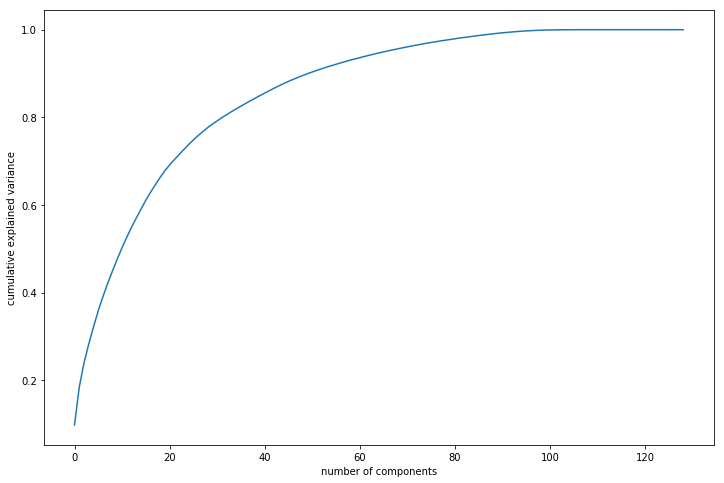

In [38]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Let's choose 60 components for our modeling

In [39]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [40]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(8857, 60)

In [41]:
#Applying selected components to the test data - 60 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(3797, 60)

### Applying a logistic regression on our Principal Components

In [42]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [43]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

## PART B - Identify the important features for churn

build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family.
In case of logistic regression, make sure to handle multi-collinearity.
After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.
 

Finally, recommend strategies to manage customer churn based on your observations.

### Use Logistic Regression to select important variables

In [44]:
# Running the first Training model using Logistic regression
import statsmodels.api as sm
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\AppFolder\Softwares\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8857
Model:                            GLM   Df Residuals:                     8728
Model Family:                Binomial   Df Model:                          128
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2499.4
Date:                Sun, 26 Aug 2018   Deviance:                       4998.9
Time:                        13:13:09   Pearson chi2:                 1.28e+05
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1183      0.079    -39.268      0.000      -3.274      -2.963
arpu_6                 0.0511      0.159      0.321      0.748      -0.261       0.363
arpu_7                -0.0479      0.184     -0.260      0.795      -0.409       0.314
arpu_8                -0.0058      0.223     -0.026      0.979      -0.443       0.431
onnet_mou_6           -0.7082      4.867     -0.146      0.884     -10.248       8.831
onnet_mou_7            0.0241      2.545      0.009      0.992      -4.964       5.012
onnet_mou_8           -1.3636      3.073     -0.444      0.657      -7.387       4.660
offnet_mou_6          -1.0659      4.907     -0.217      0.828     -10.684       8.553
offnet_mou_7           0.5208      2.492      0.209      0.834      -4.364       5.406
offnet_mou_8          -1.8140      3.075     -0.590      0.555      -7.841       4.213
roam_ic_mou_6          0.0468      0.046      1.020      0.308      -0.043       0.137
roam_ic_mou_7          0.0630      0.051      1.240      0.215      -0.037       0.163
roam_ic_mou_8          0.0139      0.041      0.336      0.737      -0.067       0.095
roam_og_mou_6          0.2583      1.255      0.206      0.837      -2.201       2.718
roam_og_mou_7          0.0183      0.518      0.035      0.972      -0.997       1.034
roam_og_mou_8          0.4593      0.710      0.647      0.518      -0.932       1.851
loc_og_t2t_mou_6    1791.3555   1617.075      1.108      0.268   -1378.052    4960.763
loc_og_t2t_mou_7    1222.0909   1692.146      0.722      0.470   -2094.455    4538.636
loc_og_t2t_mou_8    7381.4651   1693.106      4.360      0.000    4063.038    1.07e+04
loc_og_t2m_mou_6    1859.7245   1678.616      1.108      0.268   -1430.302    5149.751
loc_og_t2m_mou_7    1168.9127   1618.935      0.722      0.470   -2004.141    4341.966
loc_og_t2m_mou_8    7242.8419   1661.335      4.360      0.000    3986.685    1.05e+04
loc_og_t2f_mou_6     171.7092    154.937      1.108      0.268    -131.962     475.380
loc_og_t2f_mou_7     110.4028    153.223      0.721      0.471    -189.909     410.715
loc_og_t2f_mou_8     632.2943    145.004      4.361      0.000     348.092     916.497
loc_og_t2c_mou_6       0.0060      0.048      0.124      0.901      -0.089       0.101
loc_og_t2c_mou_7      -0.0229      0.050     -0.459      0.646      -0.121       0.075
loc_og_t2c_mou_8       0.0802      0.056      1.426      0.154      -0.030       0.191
loc_og_mou_6       -3450.3926   3112.672     -1.108      0.268   -9551.118    2650.333
loc_og_mou_7       -1880.8893   3232.730     -0.582      0.561   -8216.923    4455.144
loc_og_mou_8       -4672.6310   3382.611     -1.381      0.167   -1.13e+04    1957.165
std_og_t2t_mou_6     -96.5546   3194.738     -0.030      0.976   -6358.125    6165.016
std_og_t2t_mou_7   -6621.7704   3435.697     -1.927      0.054   -1.34e+04     112.072
std_og_t2t_mou_8    8942.6974 

In [45]:
# Lets do feature selection using RFE

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 32)             # running RFE with 32 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False False False False False  True False False False
 False  True  True False False  True False  True False False  True False
 False False False False False False False False False False False  True
 False False False False  True False False  True False False False False
 False  True  True False  True  True False False False False  True  True
 False False False False False  True False False False False False False
 False False False False False False False  True  True False False  True
 False False False False False False False  True  True  True False  True
 False False  True False False  True False False False False  True False
 False False  True False False False False False  True False False False
  True  True False False  True False False False  True]
[51 22 30 14 13 40 77 62  1 55 12 67 88  1  1 90 16  1 91  1 60 83  1 61
 95 74 41 87 52 26 82 53 25 81 38  1 54 79 27 63  1 93 73  1 80 64 17 15
 43  1  1 42  1  1 57 10  5 78  1  1  9 65 37 56 11  1 50 20  4 76  

In [47]:
col = X_train.columns[rfe.support_]
print(col)

Index(['offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_7', 'isd_og_mou_7', 'og_others_7', 'og_others_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'monthly_2g_8', 'monthly_3g_8',
       'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8'],
      dtype='object')


In [48]:
from sklearn import metrics
logreg.fit(X_train[col],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8857
Model:                            GLM   Df Residuals:                     8824
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2631.9
Date:                Sun, 26 Aug 2018   Deviance:                       5263.8
Time:                        13:14:15   Pearson chi2:                 2.46e+05
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1024      0.077    -40.207      0.000      -3.254      -2.951
offnet_mou_8          -0.7270      0.224     -3.243      0.001      -1.166      -0.288
roam_og_mou_7          0.2021      0.036      5.661      0.000       0.132       0.272
roam_og_mou_8          0.2016      0.049      4.142      0.000       0.106       0.297
loc_og_t2t_mou_8      -0.3036      0.160     -1.896      0.058      -0.617       0.010
loc_og_t2m_mou_7      -0.2704      0.135     -1.998      0.046      -0.536      -0.005
loc_og_t2f_mou_7      -0.2290      0.087     -2.619      0.009      -0.400      -0.058
std_og_t2m_mou_8       0.6697      0.208      3.225      0.001       0.263       1.077
std_og_mou_7          -0.4686      0.270     -1.735      0.083      -0.998       0.061
isd_og_mou_7           0.2061      0.074      2.773      0.006       0.060       0.352
og_others_7            0.3920      0.434      0.904      0.366      -0.458       1.242
og_others_8           -0.3528      0.556     -0.634      0.526      -1.443       0.737
total_og_mou_7         0.8857      0.283      3.129      0.002       0.331       1.441
total_og_mou_8        -0.6627      0.112     -5.927      0.000      -0.882      -0.444
loc_ic_t2m_mou_7       0.3527      0.115      3.061      0.002       0.127       0.579
loc_ic_t2m_mou_8      -0.5074      0.256     -1.979      0.048      -1.010      -0.005
loc_ic_mou_8          -0.5211      0.256     -2.033      0.042      -1.023      -0.019
total_ic_mou_7         0.2421      0.088      2.743      0.006       0.069       0.415
total_ic_mou_8        -0.6531      0.178     -3.660      0.000      -1.003      -0.303
spl_ic_mou_8          -0.3742      0.068     -5.529      0.000      -0.507      -0.242
total_rech_num_7       0.1659      0.057      2.919      0.004       0.055       0.277
total_rech_num_8      -0.1827      0.079     -2.299      0.022      -0.339      -0.027
total_rech_amt_6       0.2175      0.048      4.567      0.000       0.124       0.311
total_rech_amt_8      -0.2970      0.126     -2.355      0.019      -0.544      -0.050
max_rech_amt_8         0.2555      0.064      4.001      0.000       0.130       0.381
last_day_rch_amt_8    -0.5642      0.068     -8.323      0.000      -0.697      -0.431
vol_3g_mb_7            0.1335      0.038      3.485      0.000       0.058       0.209
monthly_2g_8          -0.3218      0.062     -5.214      0.000      -0.443      -0.201
monthly_3g_8          -0.2550      0.081     -3.142      0.002      -0.414      -0.096
aon                   -0.3234      0.046     -7.050      0.000      -0.413      -0.234
aug_vbc_3g            -0.3265      0.082     -3.967      0.000      -0.488      -0.165
sep_vbc_3g            -1.0785      0.278     -3.875      0.000      -1.624      -0.533
day_last_rech_8        0.4506      0.034     13.337      0.000       0.384       0.517
==============================

In [50]:
# function for calculating vif
def vif_cal(input_data, dependent_col):
    vif_df=pd.DataFrame(columns=['Var','Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        Vif=round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],Vif]
    return vif_df.sort_values(by='Vif', axis=0, ascending=False, inplace=False)

In [51]:
vif_cal(input_data=telechurn_final[['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_7', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8','churn']], dependent_col='churn')

,Var,Vif
10,loc_ic_mou_8,63.99
9,loc_ic_t2m_mou_8,29.99
8,loc_ic_t2t_mou_8,15.15
15,total_ic_mou_8,11.17
0,arpu_7,10.79
20,total_rech_amt_7,9.11
1,offnet_mou_8,7.26
5,std_og_t2m_mou_8,5.92
21,total_rech_amt_8,4.57
14,total_ic_mou_7,3.67


In [52]:
# remove ''total_rech_amt_7',

col = ['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_7', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8']

logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8857
Model:                            GLM   Df Residuals:                     8825
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2634.3
Date:                Sun, 26 Aug 2018   Deviance:                       5268.7
Time:                        13:14:17   Pearson chi2:                 2.40e+05
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1082      0.078    -39.924      0.000      -3.261      -2.956
arpu_7                 0.3029      0.071      4.267      0.000       0.164       0.442
offnet_mou_8          -0.7388      0.189     -3.910      0.000      -1.109      -0.368
roam_og_mou_7          0.1497      0.035      4.283      0.000       0.081       0.218
roam_og_mou_8          0.2287      0.046      4.994      0.000       0.139       0.318
loc_og_t2f_mou_8      -0.1061      0.081     -1.305      0.192      -0.265       0.053
std_og_t2m_mou_8       0.6617      0.174      3.802      0.000       0.321       1.003
std_og_mou_6           0.2827      0.039      7.164      0.000       0.205       0.360
total_og_mou_8        -0.5882      0.094     -6.287      0.000      -0.772      -0.405
loc_ic_t2t_mou_8      -0.0567      0.375     -0.151      0.880      -0.792       0.679
loc_ic_t2m_mou_8      -0.1191      0.513     -0.232      0.816      -1.124       0.886
loc_ic_mou_8          -1.0654      0.698     -1.527      0.127      -2.433       0.302
std_ic_t2t_mou_8      -0.2240      0.099     -2.263      0.024      -0.418      -0.030
std_ic_t2m_mou_7      -0.2177      0.051     -4.251      0.000      -0.318      -0.117
std_ic_t2f_mou_8      -0.1073      0.113     -0.946      0.344      -0.330       0.115
total_ic_mou_7         0.6568      0.087      7.520      0.000       0.486       0.828
total_ic_mou_8        -0.4401      0.185     -2.373      0.018      -0.804      -0.077
spl_ic_mou_8          -0.3777      0.068     -5.556      0.000      -0.511      -0.244
ic_others_7           -0.3351      0.151     -2.217      0.027      -0.631      -0.039
total_rech_num_7       0.2060      0.058      3.553      0.000       0.092       0.320
total_rech_num_8      -0.2272      0.080     -2.838      0.005      -0.384      -0.070
total_rech_amt_8      -0.2478      0.128     -1.933      0.053      -0.499       0.003
max_rech_amt_8         0.2676      0.065      4.146      0.000       0.141       0.394
last_day_rch_amt_8    -0.5744      0.069     -8.366      0.000      -0.709      -0.440
vol_3g_mb_7            0.1013      0.049      2.087      0.037       0.006       0.197
vol_3g_mb_8           -0.0557      0.081     -0.688      0.491      -0.214       0.103
monthly_2g_8          -0.3298      0.062     -5.311      0.000      -0.451      -0.208
monthly_3g_8          -0.2450      0.087     -2.813      0.005      -0.416      -0.074
aon                   -0.3381      0.046     -7.381      0.000      -0.428      -0.248
aug_vbc_3g            -0.3320      0.084     -3.932      0.000      -0.498      -0.167
sep_vbc_3g            -1.1248      0.285     -3.945      0.000      -1.684      -0.566
day_last_rech_8        0.4631      0.034     13.734      0.000       0.397       0.529
======================================================================================
"""

In [53]:
vif_cal(input_data=telechurn_final[['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_7', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8','churn']], dependent_col='churn')

,Var,Vif
10,loc_ic_mou_8,63.98
9,loc_ic_t2m_mou_8,29.99
8,loc_ic_t2t_mou_8,15.15
15,total_ic_mou_8,11.16
1,offnet_mou_8,7.26
5,std_og_t2m_mou_8,5.92
20,total_rech_amt_8,4.56
14,total_ic_mou_7,3.67
19,total_rech_num_8,3.47
7,total_og_mou_8,3.17


In [54]:
# remove ''loc_ic_t2t_mou_8',
col = ['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_7', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8']
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8857
Model:                            GLM   Df Residuals:                     8826
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2634.3
Date:                Sun, 26 Aug 2018   Deviance:                       5268.7
Time:                        13:14:18   Pearson chi2:                 2.40e+05
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1083      0.078    -39.924      0.000      -3.261      -2.956
arpu_7                 0.3026      0.071      4.265      0.000       0.164       0.442
offnet_mou_8          -0.7389      0.189     -3.910      0.000      -1.109      -0.369
roam_og_mou_7          0.1496      0.035      4.281      0.000       0.081       0.218
roam_og_mou_8          0.2288      0.046      4.997      0.000       0.139       0.319
loc_og_t2f_mou_8      -0.1035      0.079     -1.303      0.193      -0.259       0.052
std_og_t2m_mou_8       0.6620      0.174      3.804      0.000       0.321       1.003
std_og_mou_6           0.2828      0.039      7.168      0.000       0.205       0.360
total_og_mou_8        -0.5885      0.094     -6.291      0.000      -0.772      -0.405
loc_ic_t2m_mou_8      -0.0488      0.219     -0.223      0.824      -0.477       0.380
loc_ic_mou_8          -1.1627      0.275     -4.235      0.000      -1.701      -0.625
std_ic_t2t_mou_8      -0.2238      0.099     -2.262      0.024      -0.418      -0.030
std_ic_t2m_mou_7      -0.2176      0.051     -4.250      0.000      -0.318      -0.117
std_ic_t2f_mou_8      -0.1068      0.113     -0.944      0.345      -0.329       0.115
total_ic_mou_7         0.6566      0.087      7.519      0.000       0.485       0.828
total_ic_mou_8        -0.4399      0.185     -2.373      0.018      -0.803      -0.077
spl_ic_mou_8          -0.3777      0.068     -5.556      0.000      -0.511      -0.244
ic_others_7           -0.3351      0.151     -2.218      0.027      -0.631      -0.039
total_rech_num_7       0.2061      0.058      3.555      0.000       0.092       0.320
total_rech_num_8      -0.2273      0.080     -2.839      0.005      -0.384      -0.070
total_rech_amt_8      -0.2483      0.128     -1.938      0.053      -0.499       0.003
max_rech_amt_8         0.2679      0.064      4.154      0.000       0.142       0.394
last_day_rch_amt_8    -0.5744      0.069     -8.365      0.000      -0.709      -0.440
vol_3g_mb_7            0.1013      0.049      2.086      0.037       0.006       0.197
vol_3g_mb_8           -0.0555      0.081     -0.686      0.493      -0.214       0.103
monthly_2g_8          -0.3296      0.062     -5.309      0.000      -0.451      -0.208
monthly_3g_8          -0.2451      0.087     -2.815      0.005      -0.416      -0.074
aon                   -0.3378      0.046     -7.381      0.000      -0.428      -0.248
aug_vbc_3g            -0.3316      0.084     -3.929      0.000      -0.497      -0.166
sep_vbc_3g            -1.1253      0.285     -3.947      0.000      -1.684      -0.566
day_last_rech_8        0.4631      0.034     13.734      0.000       0.397       0.529
======================================================================================
"""

In [55]:
vif_cal(input_data=telechurn_final[['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_7', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8','churn']], dependent_col='churn')

,Var,Vif
9,loc_ic_mou_8,13.44
14,total_ic_mou_8,11.16
1,offnet_mou_8,7.26
5,std_og_t2m_mou_8,5.92
19,total_rech_amt_8,4.56
8,loc_ic_t2m_mou_8,4.22
13,total_ic_mou_7,3.67
18,total_rech_num_8,3.47
7,total_og_mou_8,3.17
23,vol_3g_mb_8,3.10


In [56]:
# loc_ic_t2m_mou_8
col = ['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_7', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8']


logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8857
Model:                            GLM   Df Residuals:                     8827
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2634.4
Date:                Sun, 26 Aug 2018   Deviance:                       5268.7
Time:                        13:14:19   Pearson chi2:                 2.39e+05
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1087      0.078    -39.924      0.000      -3.261      -2.956
arpu_7                 0.3025      0.071      4.264      0.000       0.163       0.442
offnet_mou_8          -0.7486      0.184     -4.067      0.000      -1.109      -0.388
roam_og_mou_7          0.1496      0.035      4.279      0.000       0.081       0.218
roam_og_mou_8          0.2302      0.045      5.061      0.000       0.141       0.319
loc_og_t2f_mou_8      -0.1021      0.079     -1.289      0.197      -0.257       0.053
std_og_t2m_mou_8       0.6700      0.170      3.931      0.000       0.336       1.004
std_og_mou_6           0.2827      0.039      7.166      0.000       0.205       0.360
total_og_mou_8        -0.5878      0.094     -6.286      0.000      -0.771      -0.404
loc_ic_mou_8          -1.2049      0.200     -6.013      0.000      -1.598      -0.812
std_ic_t2t_mou_8      -0.2238      0.099     -2.263      0.024      -0.418      -0.030
std_ic_t2m_mou_7      -0.2178      0.051     -4.255      0.000      -0.318      -0.117
std_ic_t2f_mou_8      -0.1064      0.113     -0.941      0.347      -0.328       0.115
total_ic_mou_7         0.6573      0.087      7.536      0.000       0.486       0.828
total_ic_mou_8        -0.4401      0.185     -2.373      0.018      -0.804      -0.077
spl_ic_mou_8          -0.3777      0.068     -5.556      0.000      -0.511      -0.244
ic_others_7           -0.3349      0.151     -2.216      0.027      -0.631      -0.039
total_rech_num_7       0.2058      0.058      3.551      0.000       0.092       0.319
total_rech_num_8      -0.2275      0.080     -2.842      0.004      -0.384      -0.071
total_rech_amt_8      -0.2471      0.128     -1.929      0.054      -0.498       0.004
max_rech_amt_8         0.2679      0.065      4.151      0.000       0.141       0.394
last_day_rch_amt_8    -0.5746      0.069     -8.367      0.000      -0.709      -0.440
vol_3g_mb_7            0.1015      0.049      2.090      0.037       0.006       0.197
vol_3g_mb_8           -0.0558      0.081     -0.690      0.490      -0.214       0.103
monthly_2g_8          -0.3296      0.062     -5.310      0.000      -0.451      -0.208
monthly_3g_8          -0.2454      0.087     -2.819      0.005      -0.416      -0.075
aon                   -0.3379      0.046     -7.382      0.000      -0.428      -0.248
aug_vbc_3g            -0.3319      0.084     -3.930      0.000      -0.497      -0.166
sep_vbc_3g            -1.1257      0.285     -3.948      0.000      -1.685      -0.567
day_last_rech_8        0.4631      0.034     13.734      0.000       0.397       0.529
======================================================================================
"""

In [57]:
vif_cal(input_data=telechurn_final[['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_7', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8','churn']], dependent_col='churn')

,Var,Vif
13,total_ic_mou_8,11.14
8,loc_ic_mou_8,10.69
1,offnet_mou_8,6.72
5,std_og_t2m_mou_8,5.61
18,total_rech_amt_8,4.56
12,total_ic_mou_7,3.63
17,total_rech_num_8,3.47
7,total_og_mou_8,3.14
22,vol_3g_mb_8,3.10
16,total_rech_num_7,2.89


In [58]:
# loc_og_t2f_mou_8,ic_others_7
col = ['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8']

logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8857
Model:                            GLM   Df Residuals:                     8829
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2639.2
Date:                Sun, 26 Aug 2018   Deviance:                       5278.4
Time:                        13:14:20   Pearson chi2:                 2.44e+05
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0948      0.077    -40.078      0.000      -3.246      -2.943
arpu_7                 0.2992      0.071      4.226      0.000       0.160       0.438
offnet_mou_8          -0.8013      0.182     -4.402      0.000      -1.158      -0.445
roam_og_mou_7          0.1509      0.035      4.313      0.000       0.082       0.220
roam_og_mou_8          0.2398      0.046      5.261      0.000       0.150       0.329
std_og_t2m_mou_8       0.7202      0.168      4.274      0.000       0.390       1.050
std_og_mou_6           0.2827      0.039      7.173      0.000       0.205       0.360
total_og_mou_8        -0.5835      0.093     -6.244      0.000      -0.767      -0.400
loc_ic_mou_8          -1.0898      0.194     -5.607      0.000      -1.471      -0.709
std_ic_t2t_mou_8      -0.1901      0.098     -1.948      0.051      -0.381       0.001
std_ic_t2m_mou_7      -0.1997      0.050     -3.964      0.000      -0.298      -0.101
std_ic_t2f_mou_8      -0.1023      0.114     -0.894      0.371      -0.326       0.122
total_ic_mou_7         0.6231      0.086      7.240      0.000       0.454       0.792
total_ic_mou_8        -0.5560      0.181     -3.063      0.002      -0.912      -0.200
spl_ic_mou_8          -0.3785      0.068     -5.584      0.000      -0.511      -0.246
total_rech_num_7       0.2065      0.058      3.565      0.000       0.093       0.320
total_rech_num_8      -0.2270      0.080     -2.837      0.005      -0.384      -0.070
total_rech_amt_8      -0.2482      0.128     -1.942      0.052      -0.499       0.002
max_rech_amt_8         0.2597      0.064      4.052      0.000       0.134       0.385
last_day_rch_amt_8    -0.5723      0.068     -8.362      0.000      -0.706      -0.438
vol_3g_mb_7            0.0989      0.049      2.038      0.042       0.004       0.194
vol_3g_mb_8           -0.0524      0.080     -0.651      0.515      -0.210       0.105
monthly_2g_8          -0.3260      0.062     -5.268      0.000      -0.447      -0.205
monthly_3g_8          -0.2398      0.087     -2.772      0.006      -0.409      -0.070
aon                   -0.3437      0.046     -7.523      0.000      -0.433      -0.254
aug_vbc_3g            -0.3335      0.085     -3.946      0.000      -0.499      -0.168
sep_vbc_3g            -1.1206      0.284     -3.950      0.000      -1.677      -0.565
day_last_rech_8        0.4609      0.034     13.718      0.000       0.395       0.527
======================================================================================
"""

In [59]:
vif_cal(input_data=telechurn_final[['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8','churn']], dependent_col='churn')

,Var,Vif
12,total_ic_mou_8,10.70
7,loc_ic_mou_8,10.14
1,offnet_mou_8,6.54
4,std_og_t2m_mou_8,5.47
16,total_rech_amt_8,4.56
11,total_ic_mou_7,3.57
15,total_rech_num_8,3.47
6,total_og_mou_8,3.14
20,vol_3g_mb_8,3.10
14,total_rech_num_7,2.89


In [60]:
#'total_ic_mou_8',
col = ['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7',  'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8']
logm6 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8857
Model:                            GLM   Df Residuals:                     8830
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2644.9
Date:                Sun, 26 Aug 2018   Deviance:                       5289.8
Time:                        13:14:21   Pearson chi2:                 2.66e+05
No. Iterations:                     9                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0891      0.077    -40.071      0.000      -3.240      -2.938
arpu_7                 0.3218      0.070      4.590      0.000       0.184       0.459
offnet_mou_8          -0.8228      0.183     -4.493      0.000      -1.182      -0.464
roam_og_mou_7          0.1425      0.035      4.089      0.000       0.074       0.211
roam_og_mou_8          0.2566      0.046      5.621      0.000       0.167       0.346
std_og_t2m_mou_8       0.7219      0.170      4.253      0.000       0.389       1.055
std_og_mou_6           0.2851      0.039      7.229      0.000       0.208       0.362
total_og_mou_8        -0.5840      0.093     -6.249      0.000      -0.767      -0.401
loc_ic_mou_8          -1.4849      0.139    -10.654      0.000      -1.758      -1.212
std_ic_t2t_mou_8      -0.2965      0.090     -3.283      0.001      -0.473      -0.120
std_ic_t2m_mou_7      -0.2226      0.050     -4.435      0.000      -0.321      -0.124
std_ic_t2f_mou_8      -0.1457      0.118     -1.236      0.216      -0.377       0.085
total_ic_mou_7         0.5202      0.077      6.713      0.000       0.368       0.672
spl_ic_mou_8          -0.3897      0.068     -5.719      0.000      -0.523      -0.256
total_rech_num_7       0.2102      0.058      3.630      0.000       0.097       0.324
total_rech_num_8      -0.2317      0.080     -2.889      0.004      -0.389      -0.075
total_rech_amt_8      -0.2806      0.127     -2.212      0.027      -0.529      -0.032
max_rech_amt_8         0.2586      0.064      4.050      0.000       0.133       0.384
last_day_rch_amt_8    -0.5745      0.068     -8.391      0.000      -0.709      -0.440
vol_3g_mb_7            0.0967      0.049      1.992      0.046       0.002       0.192
vol_3g_mb_8           -0.0522      0.080     -0.650      0.516      -0.210       0.105
monthly_2g_8          -0.3214      0.062     -5.209      0.000      -0.442      -0.200
monthly_3g_8          -0.2366      0.087     -2.730      0.006      -0.407      -0.067
aon                   -0.3434      0.046     -7.528      0.000      -0.433      -0.254
aug_vbc_3g            -0.3501      0.085     -4.104      0.000      -0.517      -0.183
sep_vbc_3g            -1.1042      0.282     -3.917      0.000      -1.657      -0.552
day_last_rech_8        0.4602      0.034     13.728      0.000       0.394       0.526
======================================================================================
"""

In [61]:
vif_cal(input_data=telechurn_final[['arpu_7', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_6',
       'total_og_mou_8',  'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'total_ic_mou_7',  'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'day_last_rech_8','churn']], dependent_col='churn')

,Var,Vif
1,offnet_mou_8,6.54
4,std_og_t2m_mou_8,5.46
15,total_rech_amt_8,4.54
11,total_ic_mou_7,3.49
14,total_rech_num_8,3.47
7,loc_ic_mou_8,3.22
6,total_og_mou_8,3.14
19,vol_3g_mb_8,3.10
13,total_rech_num_7,2.89
0,arpu_7,2.77


### The key variables determining the churn are - 
<b>arpu_7, offnet_mou_8, roam_og_mou_7, roam_og_mou_8,  std_og_t2m_mou_8, std_og_mou_6,  total_og_mou_8,  loc_ic_mou_8, std_ic_t2t_mou_8, std_ic_t2m_mou_7,  std_ic_t2f_mou_8, total_ic_mou_7,  spl_ic_mou_8,  total_rech_num_7, total_rech_num_8,  total_rech_amt_8, max_rech_amt_8, last_day_rch_amt_8, vol_3g_mb_7, vol_3g_mb_8, monthly_2g_8,  monthly_3g_8, aon, aug_vbc_3g, sep_vbc_3g, day_last_rech_8</b>

## Making Predictions 

In [62]:
from sklearn.linear_model import LogisticRegression
logsk = LogisticRegression()
logsk.fit(X_train[col],y_train)
y_pred = logsk.predict_proba(X_test[col])


In [63]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.110236
1,0.051700
2,0.062504
3,0.012228
4,0.128734


In [64]:
y_test_df=pd.DataFrame(y_test)
y_test_df['mobile_number']= y_test_df.index

y_test_df.head()


,churn,mobile_number
22119,0,22119
114,0,114
15522,0,15522
16892,1,16892
123,0,123


In [65]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,churn,mobile_number,1
0,0,22119,0.110236
1,0,114,0.051700
2,0,15522,0.062504
3,1,16892,0.012228
4,0,123,0.128734


In [66]:
y_pred_final = y_pred_final.rename(columns={1:'Churn_prob'})

In [67]:
y_pred_final = y_pred_final.reindex_axis(['mobile_number','churn','Churn_prob'],axis=1)
y_pred_final.head()

C:\AppFolder\Softwares\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


,mobile_number,churn,Churn_prob
0,22119,0,0.110236
1,114,0,0.051700
2,15522,0,0.062504
3,16892,1,0.012228
4,123,0,0.128734


In [68]:
y_pred_final['predicted'] = y_pred_final.Churn_prob.map(lambda a: 1 if a >.5 else 0)
y_pred_final.head()

,mobile_number,churn,Churn_prob,predicted
0,22119,0,0.110236,0
1,114,0,0.051700,0
2,15522,0,0.062504,0
3,16892,1,0.012228,0
4,123,0,0.128734,0


## Model Evaluation

In [69]:
# from sklearn import metrics
conf = metrics.confusion_matrix(y_pred_final.churn,y_pred_final.predicted)
conf

array([[3018,  125],
       [ 372,  282]], dtype=int64)

In [70]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8691071898867527

In [71]:
TPos = conf[1,1]
TNeg = conf[0,0]
FPos =conf[0,1]
FNeg = conf[1,0]
# Sensitivity - fraction of actual churn identified correctly
print(TPos / float(TPos+FNeg))

#Specificity - the percentage of actual not_churn is identified correctly
print(TNeg/float(TNeg+FPos))

0.43119266055045874
0.960229080496341


### Finding Optimal cutoff point.

In [72]:
# create column with different probability cut-off
num = [float(x)/10 for x in range(10)]
for i in num:
    y_pred_final[i] = y_pred_final.Churn_prob.map(lambda a: 1 if a>i else 0)
y_pred_final.head()

,mobile_number,churn,Churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,22119,0,0.110236,0,1,1,0,0,0,0,0,0,0,0
1,114,0,0.051700,0,1,0,0,0,0,0,0,0,0,0
2,15522,0,0.062504,0,1,0,0,0,0,0,0,0,0,0
3,16892,1,0.012228,0,1,0,0,0,0,0,0,0,0,0
4,123,0,0.128734,0,1,1,0,0,0,0,0,0,0,0


In [73]:
# cal sens and specificity for different probs
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn,y_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy =(cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.172241  0.000000  1.000000
0.1   0.1  0.695022  0.655425  0.885321
0.2   0.2  0.827232  0.830735  0.810398
0.3   0.3  0.866210  0.902323  0.692661
0.4   0.4  0.877008  0.937639  0.585627
0.5   0.5  0.869107  0.960229  0.431193
0.6   0.6  0.855412  0.973592  0.287462
0.7   0.7  0.842244  0.983137  0.165138
0.8   0.8  0.838030  0.992682  0.094801
0.9   0.9  0.830129  0.997773  0.024465


C:\AppFolder\Softwares\anaconda\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


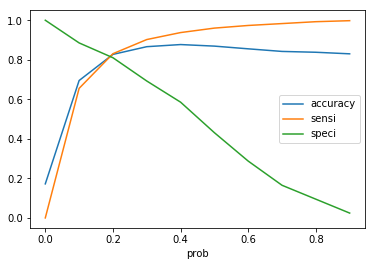

In [78]:
# plot accuracy, sensitivity and specificity for different probabiities
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

# Conclusion


Hence after fitting PCA model data output to logistic regrssion we are able to find the key attributes that will help in predict the high value customer churn.

Assumptions made - Consider high value customer above 70% and  Since the Churn Rate is low, it is case of class imbalance,we deleted instances from the over-represented class,called under-sampling

# After model evaluation the Model Accuracy Score - 0.86 

Below are the attribute -
arpu_7, offnet_mou_8, roam_og_mou_7, roam_og_mou_8, std_og_t2m_mou_8, std_og_mou_6, total_og_mou_8, loc_ic_mou_8, std_ic_t2t_mou_8, std_ic_t2m_mou_7, std_ic_t2f_mou_8, total_ic_mou_7, spl_ic_mou_8, total_rech_num_7, total_rech_num_8, total_rech_amt_8, max_rech_amt_8, last_day_rch_amt_8, vol_3g_mb_7, vol_3g_mb_8, monthly_2g_8, monthly_3g_8, aon, aug_vbc_3g, sep_vbc_3g, day_last_rech_8